### Trending Skills

In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filter DataFrame for only Data Analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# Extract month number from job posted date
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Expand list of skills into separate rows
df_DA_exploded = df_DA.explode('job_skills')

# Count occurrences of each skill per month
df_DA_pivot = df_DA_exploded.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# Add a total row for sorting purposes
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

# Sort columns by total occurences (most frequently required skills first)
df_DA_pivot.sort_values(by='Total', axis=1, ascending=False, inplace=True)

# Remove the temporary total row
df_DA_pivot.drop('Total', inplace=True)

df_DA_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


### Visualization

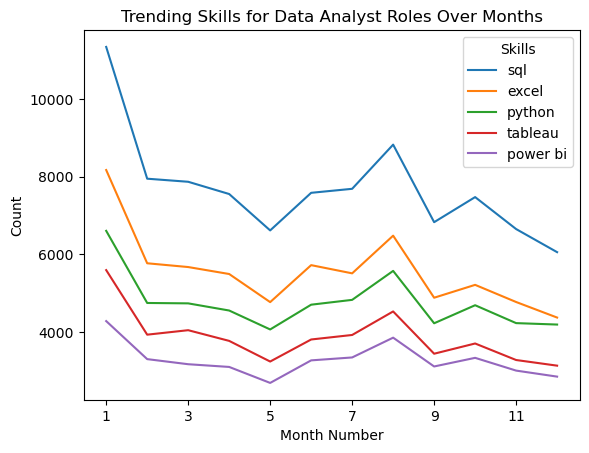

In [18]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Skills for Data Analyst Roles Over Months')
plt.xlabel('Month Number')
plt.ylabel('Count')
plt.legend(title='Skills')
plt.show()